In [ ]:
import numpy as np
import torch
import h5py
import matplotlib.pyplot as plt
from dataset.phc_dataset import PhC2D, PhC2DBandgap, PhC2DBandgapQuickLoad

# Classification PhC Dataset

In [2]:
train_dataset = PhC2D(train=True)
test_dataset = PhC2D(train=False)

train_inputs = train_dataset[:][0]
train_classes = train_dataset[:][1]
test_inputs = test_dataset[:][0]
test_classes = test_dataset[:][1]

In [3]:
train_indices = np.load('dataset/train_indices.npy')
test_indices = np.load('dataset/test_indices.npy')

In [4]:
assert(len(train_indices) == len(set(train_indices)))
assert(len(test_indices) == len(set(test_indices)))

In [5]:
print(f'Number of training samples = {len(train_indices)}')
print(f'Number of test samples = {len(test_indices)}')
print(f'Overlapping samples = {len(set(train_indices).intersection(set(test_indices)))}')

Number of training samples = 9876
Number of test samples = 1500
Overlapping samples = 0


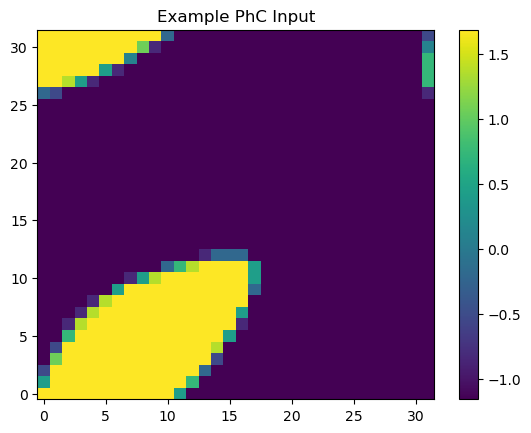

In [6]:
# Plot example of PhC crystals
large_bandgap_index = np.where(train_classes == 4)[0][0]

x, y = np.arange(32), np.arange(32)

fig, ax = plt.subplots()
my_ax = ax.pcolormesh(x, y, train_inputs[large_bandgap_index][0])
plt.title('Example PhC Input')
plt.colorbar(my_ax)
plt.show()

# Comparing Classification and Regression PhC Datasets

In [7]:
regression_train_dataset = PhC2DBandgap(train=True)
regression_test_dataset = PhC2DBandgap(train=False)

In [8]:
regression_train_classes = regression_train_dataset[:][1].clone()
regression_train_classes[regression_train_dataset[:][1] == 0] = 0
regression_train_classes[(regression_train_dataset[:][1] > 0) & (regression_train_dataset[:][1] < 5)] = 1
regression_train_classes[(regression_train_dataset[:][1] > 5) & (regression_train_dataset[:][1] < 12)] = 2
regression_train_classes[(regression_train_dataset[:][1] > 12) & (regression_train_dataset[:][1] < 20)] = 3
regression_train_classes[(regression_train_dataset[:][1] > 20)] = 4
regression_train_classes = regression_train_classes.type(torch.int64)

assert(torch.all(regression_train_classes == train_classes))

In [9]:
# The crystal inputs for both datasets are the same
assert(torch.all(train_inputs == regression_train_dataset[:][0]))
assert(torch.all(test_inputs == regression_test_dataset[:][0]))

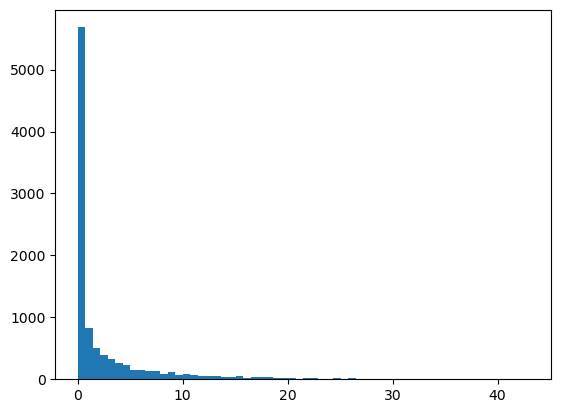

In [10]:
plt.hist(regression_train_dataset[:][1], bins=60)
plt.show()

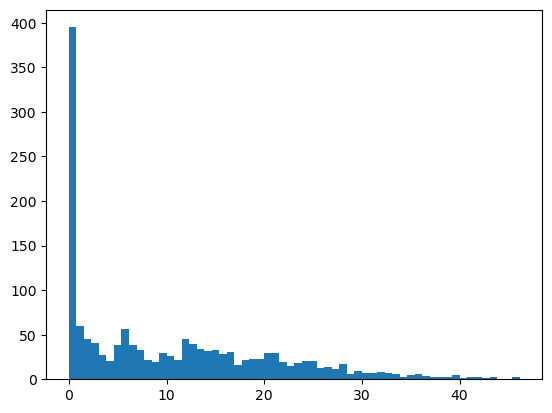

In [11]:
plt.hist(regression_test_dataset[:][1], bins=60)
plt.show()

# Plot density of states example

In [12]:
bandgap_value_file = h5py.File('data/phc/raw/mf1-tm-32k.h5', 'r')
bandgap_class_file = h5py.File('data/phc/raw/bandgap_5classes_4.h5', 'r')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'data/phc/raw/mf1-tm-32k.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
bandgap_classes = []
for index in range(len(bandgap_class_file['class'])):
    bandgap_classes.append(bandgap_class_file['class/'+str(index)][()])

In [ ]:
bandgap_classes = np.array(bandgap_classes)
large_bandgap_index = np.where(bandgap_classes == 4)[0][1]
oldindex = bandgap_class_file['oldindex/'+str(large_bandgap_index)][()]

Bandgap info: [[ 6.8343782   0.2660035   0.2848264 ]
 [29.362       0.35364062  0.47534382]
 [ 6.305908    0.58274496  0.6206887 ]
 [ 0.3674932   0.6894979   0.6920364 ]
 [ 2.5608914   0.74932724  0.7687656 ]
 [ 0.22975755  0.8319028   0.83381635]
 [ 0.3688036   0.86438096  0.8675747 ]
 [ 1.7572914   0.89707947  0.9129835 ]]


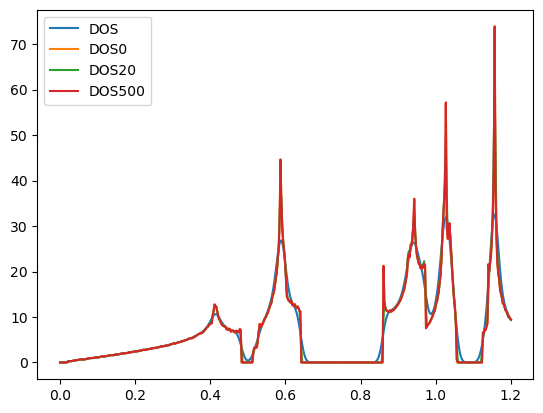

In [ ]:
frequencies = np.linspace(0, 1.2, num=500) # Not sure this is max frequency

print(f"Bandgap info: {bandgap_value_file['mpbcal/bandgap/'+str(oldindex)][()]}")

plt.plot(frequencies, bandgap_value_file['mpbcal/DOS/'+str(oldindex)][()], label='DOS')
plt.plot(frequencies, bandgap_value_file['mpbcal/DOS0/'+str(oldindex)][()], label='DOS0')
plt.plot(frequencies, bandgap_value_file['mpbcal/DOS20/'+str(oldindex)][()], label='DOS20')
plt.plot(frequencies, bandgap_value_file['mpbcal/DOS500/'+str(oldindex)][()], label='DOS500')
plt.legend()
plt.show()

# Confirm Quicker Loading Dataset is Same as Original

In [ ]:
regression_train_dataset_quick = PhC2DBandgapQuickLoad(train=True)
regression_test_dataset_quick = PhC2DBandgapQuickLoad(train=False)

In [ ]:
assert(torch.all(regression_train_dataset[:][0] == regression_train_dataset_quick[:][0]))
assert(torch.all(regression_train_dataset[:][1] == regression_train_dataset_quick[:][1]))
assert(torch.all(regression_test_dataset[:][0] == regression_test_dataset_quick[:][0]))
assert(torch.all(regression_test_dataset[:][1] == regression_test_dataset_quick[:][1]))